In [1]:
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

import ipdb

import progressbar

In [2]:
import torch
import torch.nn as nn

# Data generation

In [22]:
n = 1000
x = np.random.uniform(low = -np.pi/2, high = np.pi, size = n)
y = np.sin(x)
#y_bin = 2*np.random.binomial(n = 1, p = 1/2*(y+1), size = n) - 1
y_bin = np.random.binomial(n = 1, p = 1/2*(y+1), size = n) 

In [24]:
x_torch = torch.from_numpy(x,).reshape((-1,1)).float()
y_torch = torch.from_numpy(y).reshape((-1,1)).float()
y_bin_torch = torch.from_numpy(y_bin.reshape((-1,1))).float()

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


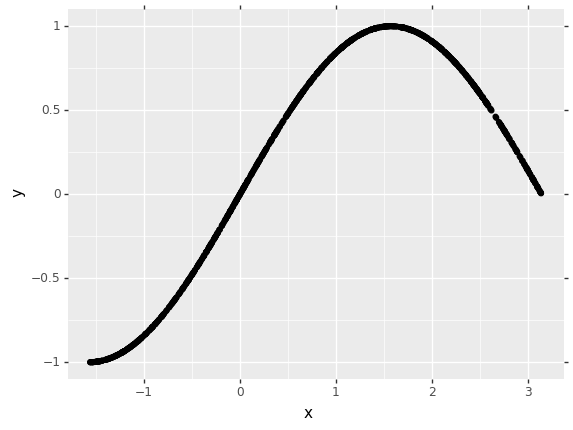

<ggplot: (8772382426821)>

In [25]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y,
                              "y_bin":y_bin})) +\
    p9.geom_point(p9.aes(x="x",y="y"))

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


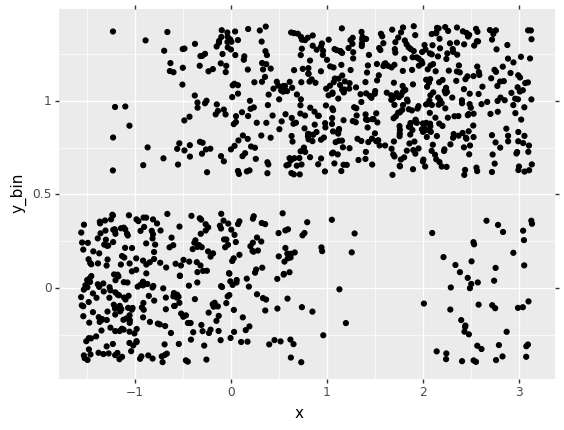

<ggplot: (8772381899005)>

In [26]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y,
                              "y_bin":y_bin})) +\
    p9.geom_jitter(p9.aes(x="x",y="y_bin"))

# Simple Models
## Simple Linear Regression

In [27]:
class my_regression(nn.Module):
    def __init__(self):
        super(my_regression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.linear(x)
        
        return(out)

In [28]:
lr = 1e-2
reg_model = my_regression()
optimizer = torch.optim.SGD(reg_model.parameters(), lr=lr)

criterion = nn.MSELoss()

In [29]:
from torch.autograd import Variable


In [30]:
epochs = 1000
for e in range(epochs):
    optimizer.zero_grad()
        
    output = reg_model(Variable(x_torch.float()))
    loss = criterion(output, y_torch.float())
    loss.backward()
    optimizer.step()

    if e % 50 == 0:
        print(f"Training loss: {loss}")


Training loss: 4.036050319671631
Training loss: 0.19647876918315887
Training loss: 0.17365945875644684
Training loss: 0.17125104367733002
Training loss: 0.17063944041728973
Training loss: 0.17048096656799316
Training loss: 0.17043988406658173
Training loss: 0.17042924463748932
Training loss: 0.17042648792266846
Training loss: 0.17042578756809235
Training loss: 0.17042559385299683
Training loss: 0.17042553424835205
Training loss: 0.17042551934719086
Training loss: 0.17042553424835205
Training loss: 0.17042551934719086
Training loss: 0.17042551934719086
Training loss: 0.17042551934719086
Training loss: 0.17042551934719086
Training loss: 0.17042551934719086
Training loss: 0.17042551934719086


In [31]:
y_fit = reg_model(Variable(x_torch.float()))
y_fit_np = y_fit.detach().numpy().ravel()

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


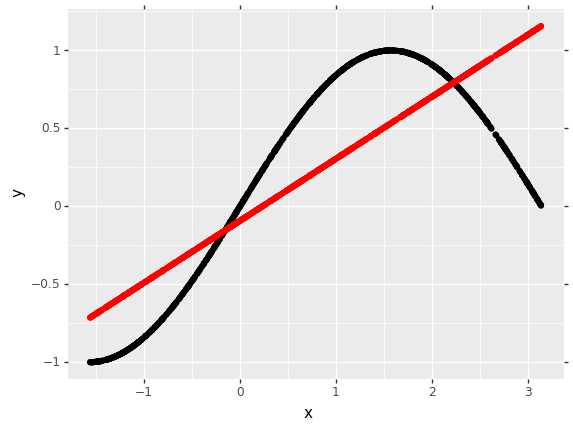

<ggplot: (-9223363264472600590)>

In [32]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y,
                              "y_fit":y_fit_np})) +\
    p9.geom_point(p9.aes(x="x",y="y")) +\
    p9.geom_point(p9.aes(x="x", y = "y_fit"), color = "red")

## Logistic Regression

helpful: https://medium.com/analytics-vidhya/pytorch-for-deep-learning-binary-classification-logistic-regression-382abd97fb43

In [33]:
class my_logistic_regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        l_out = self.linear(x)
        out = self.sigmoid(l_out)
        
        return(out)

In [34]:
lr = 1e-2
log_model = my_logistic_regression()
optimizer = torch.optim.SGD(reg_model.parameters(), lr=lr)

ce_criterion = nn.BCELoss() # binary cross entropy loss (vs the normal which is multiple)

In [35]:
epochs = 1000
for e in range(epochs):
    optimizer.zero_grad()
        
    output = log_model(Variable(x_torch))
    loss = ce_criterion(output, y_bin_torch)
    loss.backward()
    optimizer.step()

    if e % 50 == 0:
        print(f"Training loss: {loss}")


Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187
Training loss: 1.4462283849716187


In [36]:
y_fit = log_model(Variable(x_torch.float()))
y_fit_np = y_fit.detach().numpy().ravel()

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


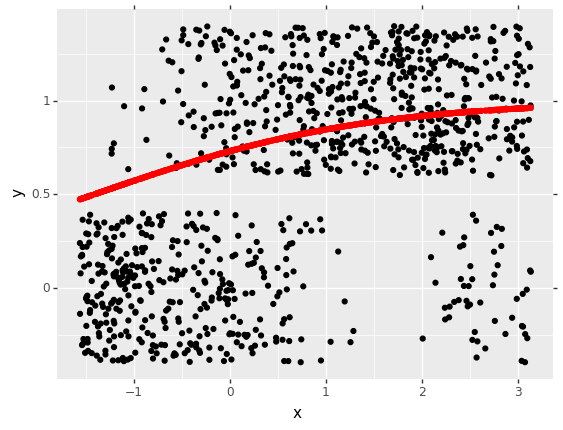

<ggplot: (8772382955468)>

In [39]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y_bin, 
                              "y_fit":1-y_fit_np})) +\ # for some reason not the order I expected...
    p9.geom_jitter(p9.aes(x="x",y="y")) +\
    p9.geom_point(p9.aes(x="x", y = "y_fit"), color = "red")

# Multi-layer Models
## Regression 
### 1 Hidden layer

In [53]:
class my_smooth_regression(nn.Module):
    def __init__(self, n_hidden):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(1, n_hidden),
                                   nn.Sigmoid(), #nn.ReLU might also work...
                                   nn.Linear(n_hidden,1))
    
    def forward(self, x):
        out = self.model(x)
        
        return(out)

In [54]:
lr = 1e-2
reg_model = my_smooth_regression(100)
optimizer = torch.optim.SGD(reg_model.parameters(), lr=lr)

criterion = nn.MSELoss()

In [55]:
epochs = 1000
for e in range(epochs):
    optimizer.zero_grad()
        
    output = reg_model(Variable(x_torch.float()))
    loss = criterion(output, y_torch.float())
    loss.backward()
    optimizer.step()

    if e % 50 == 0:
        print(f"Training loss: {loss}")

Training loss: 0.5060815811157227
Training loss: 0.12228989601135254
Training loss: 0.11595357209444046
Training loss: 0.11229941993951797
Training loss: 0.10879027098417282
Training loss: 0.10539153218269348
Training loss: 0.10209797322750092
Training loss: 0.09890531003475189
Training loss: 0.09580972045660019
Training loss: 0.09280787408351898
Training loss: 0.0898967981338501
Training loss: 0.08707386255264282
Training loss: 0.08433672040700912
Training loss: 0.08168330043554306
Training loss: 0.07911171764135361
Training loss: 0.07662025839090347
Training loss: 0.0742073804140091
Training loss: 0.07187163084745407
Training loss: 0.06961166113615036
Training loss: 0.06742621213197708


In [56]:
y_fit = reg_model(Variable(x_torch.float()))
y_fit_np = y_fit.detach().numpy().ravel()

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


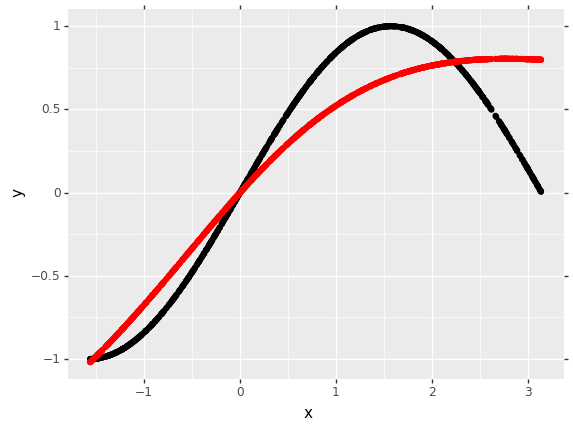

<ggplot: (-9223363264471375367)>

In [57]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y,
                              "y_fit":y_fit_np})) +\
    p9.geom_point(p9.aes(x="x",y="y")) +\
    p9.geom_point(p9.aes(x="x", y = "y_fit"), color = "red")

### 2 hidden layers

In [79]:
class my_2_layer_smooth_regression(nn.Module):
    def __init__(self, n_hidden1, n_hidden2):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(1, n_hidden1),
                                   nn.ReLU(), #nn.ReLU might also work...
                                   nn.Linear(n_hidden1, n_hidden2),
                                   nn.ReLU(),
                                   nn.Linear(n_hidden2,1))
    
    def forward(self, x):
        out = self.model(x)
        
        return(out)

In [80]:
lr = 1e-2
reg_model = my_2_layer_smooth_regression(100,10)
optimizer = torch.optim.SGD(reg_model.parameters(), lr=lr)

criterion = nn.MSELoss()

In [81]:
epochs = 1000
for e in range(epochs):
    optimizer.zero_grad()
        
    output = reg_model(Variable(x_torch.float()))
    loss = criterion(output, y_torch.float())
    loss.backward()
    optimizer.step()

    if e % 50 == 0:
        print(f"Training loss: {loss}")

Training loss: 0.6263725161552429
Training loss: 0.13354052603244781
Training loss: 0.09112085402011871
Training loss: 0.07043462246656418
Training loss: 0.05569484829902649
Training loss: 0.04434701055288315
Training loss: 0.035502947866916656
Training loss: 0.028677048161625862
Training loss: 0.023361152037978172
Training loss: 0.019231924787163734
Training loss: 0.0160397719591856
Training loss: 0.013533633202314377
Training loss: 0.011563416570425034
Training loss: 0.010003607720136642
Training loss: 0.008751686662435532
Training loss: 0.007731655612587929
Training loss: 0.006931652314960957
Training loss: 0.0062639107927680016
Training loss: 0.005690248683094978
Training loss: 0.0051827700808644295


In [77]:
y_fit = reg_model(Variable(x_torch.float()))
y_fit_np = y_fit.detach().numpy().ravel()

/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/benjaminleroy/miniconda3/lib/python3.6/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


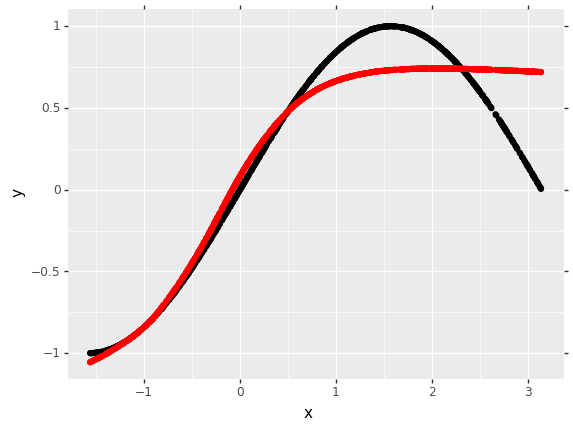

<ggplot: (-9223363264472600604)>

In [82]:
p9.ggplot(pd.DataFrame(data = {"x":x, "y":y,
                              "y_fit":y_fit_np})) +\
    p9.geom_point(p9.aes(x="x",y="y")) +\
    p9.geom_point(p9.aes(x="x", y = "y_fit"), color = "red")